**Pattern Recognition System**

In [1]:
# Import library

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog

from sklearn import metrics
import cv2
import numpy as np
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt

Import training data

In [2]:
root_dir = "ROI_1"

# Initialize lists to store the image data and labels
image_data = []
image_labels = []

# Iterate through all subfolders in the root directory
for subfolder in os.listdir(root_dir):
    subfolder_path = os.path.join(root_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Get all the image file paths in the current subfolder
        image_paths = glob.glob(os.path.join(subfolder_path, '*.jpg'))
        for image_path in image_paths:
            # Open the image and store its data
            img = Image.open(image_path)
            image_data.append(np.array(img))
            # Store the label of the image as the subfolder name
            image_labels.append(subfolder)

# Convert the lists to arrays
X = np.array(image_data)
y = np.array(image_labels)


Extracting HOG feature

In [3]:
X_hog = []
for img in X:
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2')
    X_hog.append(hog_features)
X_hog = np.array(X_hog)

Split the data: 80% Training and 20% Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2)

Create KNN model

In [5]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Test 20% data

In [6]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Plot Confusion matrix

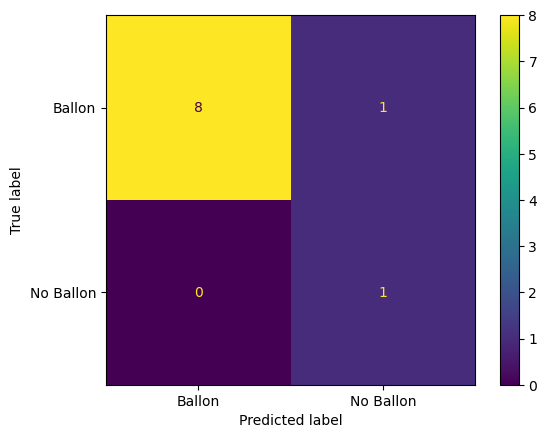

In [7]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ballon', 'No Ballon'])

cm_display.plot()
plt.show()

Now import new data for verification

In [8]:
folder_path = "ROI_2"

new_image_data = []

# Get all the image file paths in the folder
image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
for image_path in image_paths:
    # Open the image and store its data
    img = Image.open(image_path)
    new_image_data.append(np.array(img))

# Convert the list to an array
new_data = np.array(new_image_data)

Extracting HOG feature from new data

In [9]:
new_data_hog = []
for img in new_data:
    hog_features = hog(img, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2')
    new_data_hog.append(hog_features)
new_data_hog = np.array(new_data_hog)

Predict the label of new image data

In [10]:
predictions = knn.predict(new_data_hog)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Print the label against the each image

In [11]:
for i, pred in enumerate(predictions):
    print("Prediction for image {}: {}".format(i+1, pred))

Prediction for image 1: Ballon
Prediction for image 2: Ballon
Prediction for image 3: Ballon
Prediction for image 4: Ballon
Prediction for image 5: Ballon
Prediction for image 6: No Ballon
Prediction for image 7: Ballon
Prediction for image 8: No Ballon
Prediction for image 9: Ballon
Prediction for image 10: Ballon
Prediction for image 11: Ballon
Prediction for image 12: Ballon
Prediction for image 13: Ballon
Prediction for image 14: Ballon
Prediction for image 15: Ballon
Prediction for image 16: Ballon
Prediction for image 17: Ballon
Prediction for image 18: Ballon
Prediction for image 19: Ballon
Prediction for image 20: Ballon
Prediction for image 21: Ballon
Prediction for image 22: Ballon
Prediction for image 23: Ballon
Prediction for image 24: Ballon
Prediction for image 25: Ballon
Prediction for image 26: Ballon
Prediction for image 27: Ballon
Prediction for image 28: Ballon
Prediction for image 29: Ballon
Prediction for image 30: Ballon
Prediction for image 31: Ballon
Prediction 